# 머신러닝

## 학생 결석 여부 확인 데이터

- 성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
- 나이(age) 숫자: 15 - 22     
- 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
- 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
- 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
- 주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
- 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
- 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
- 학고횟수(failures)  숫자 : 1, 2, 3 else 4     
- 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
- 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)  

In [1]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/7주차_0625/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20.0,A,2,2,other,2,1.0,2,5,5.0,11
391,M,17.0,T,1,3,mother,1,2.0,0,2,4.0,3
392,M,21.0,T,1,1,other,1,1.0,3,5,5.0,3
393,M,18.0,T,2,3,mother,1,3.0,0,4,4.0,0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
import sklearn
from sklearn import *
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel, SelectKBest


from sklearn.pipeline import Pipeline

### 1-1 데이터 EDA 및 시각화

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


In [5]:
df1.describe()

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
count,392.000000,395.000000,395.000000,395.000000,392.000000,395.000000,395.000000,390.000000,395.000000
mean,16.698980,2.521519,2.749367,2.035443,1.446429,0.334177,3.944304,3.233333,5.708861
std,1.279865,1.088201,1.094735,0.839240,0.695022,0.743651,0.896659,1.000985,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,17.000000,2.000000,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,4.000000
75%,18.000000,3.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000


In [6]:
df1.corr()

C:\Users\Devin\AppData\Local\Temp\ipykernel_36212\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
age,1.000000,-0.162190,-0.161852,-0.005905,0.064570,0.243075,0.052644,0.007248,0.174157
Fedu,-0.162190,1.000000,0.623455,-0.009175,-0.166499,-0.250408,-0.001370,-0.011424,0.024473
Medu,-0.161852,0.623455,1.000000,0.064944,-0.163966,-0.236680,-0.003914,0.030082,0.100285
studytime,-0.005905,-0.009175,0.064944,1.000000,-0.098343,-0.173563,0.039731,-0.138619,-0.062700
traveltime,0.064570,-0.166499,-0.163966,-0.098343,1.000000,0.094084,-0.021061,-0.011963,-0.009684
failures,0.243075,-0.250408,-0.236680,-0.173563,0.094084,1.000000,-0.044337,0.076487,0.063726
famrel,0.052644,-0.001370,-0.003914,0.039731,-0.021061,-0.044337,1.000000,0.153086,-0.044354
freetime,0.007248,-0.011424,0.030082,-0.138619,-0.011963,0.076487,0.153086,1.000000,-0.056825
absences,0.174157,0.024473,0.100285,-0.062700,-0.009684,0.063726,-0.044354,-0.056825,1.000000


In [7]:
target = ['absence']
col_features = list(df1.columns[:-1])

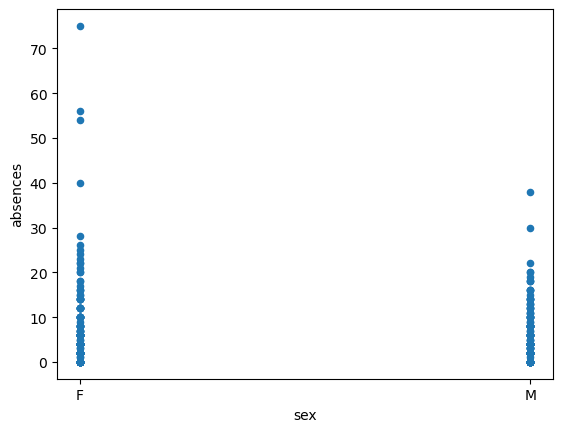

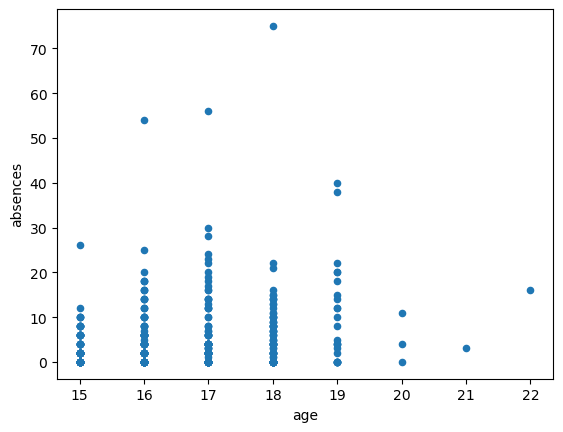

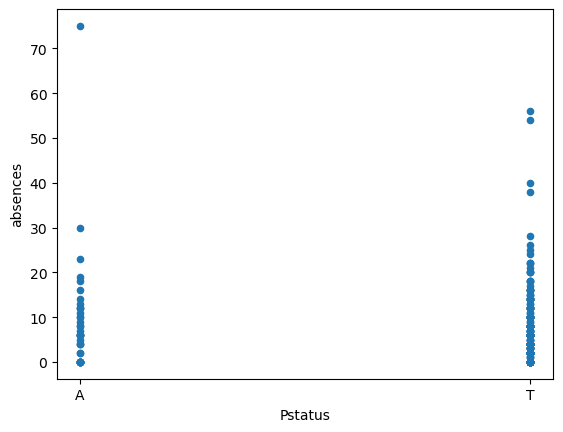

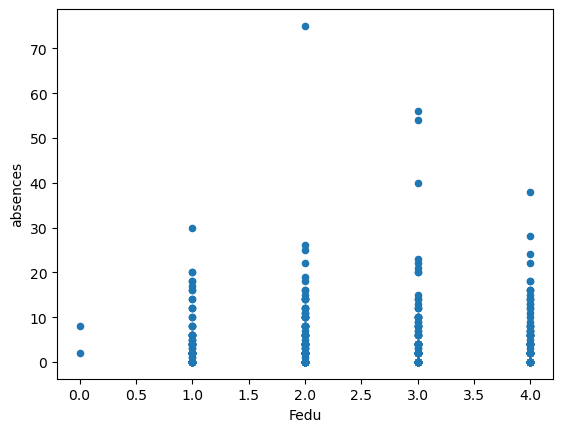

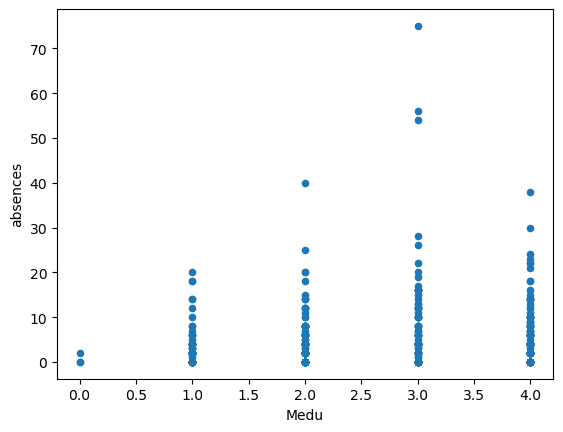

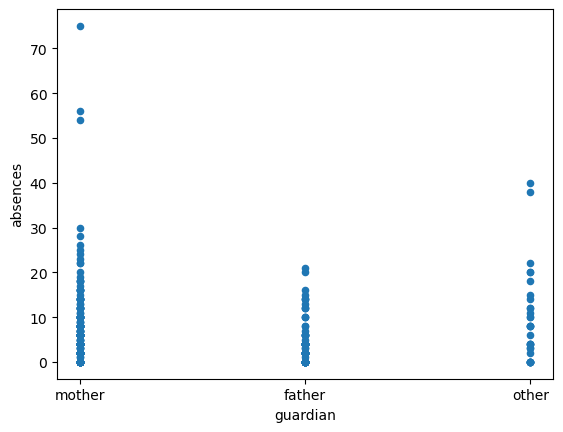

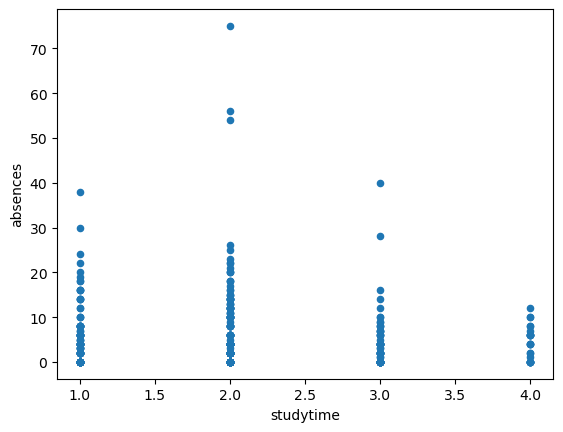

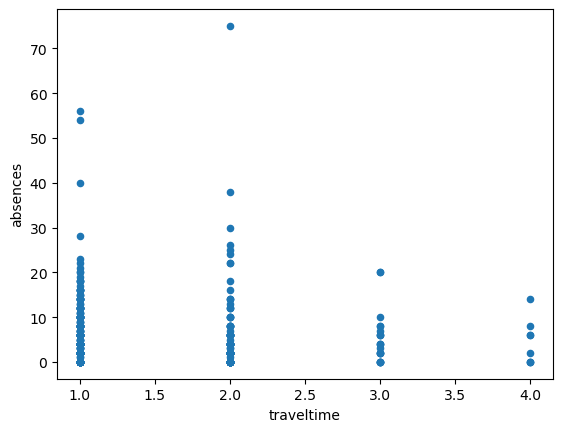

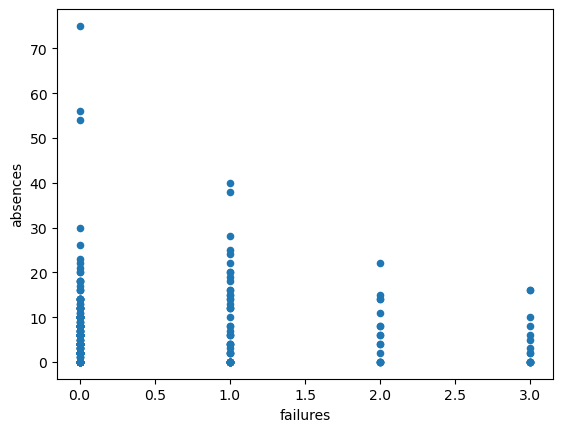

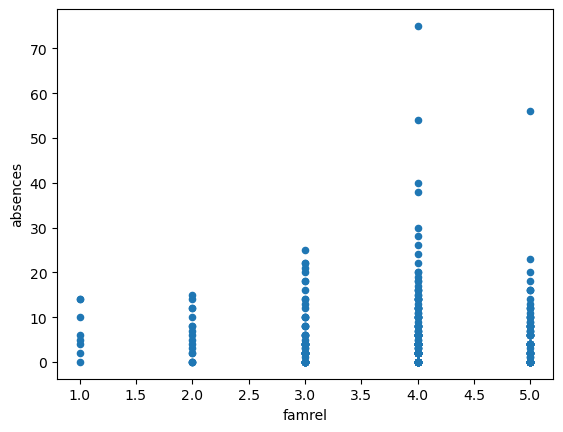

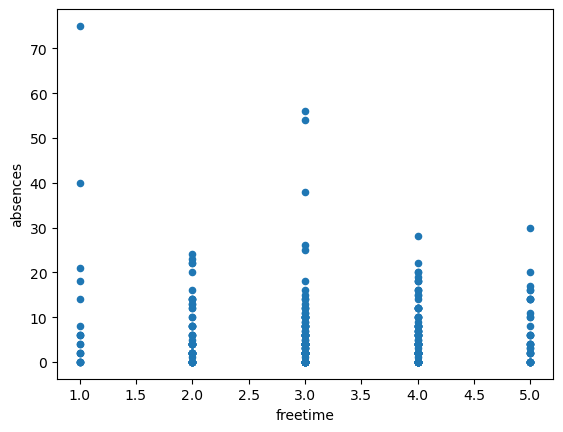

In [8]:
for i in range(len(col_features)):
    df1.plot(kind='scatter', x=col_features[i], y='absences')

(array([287.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

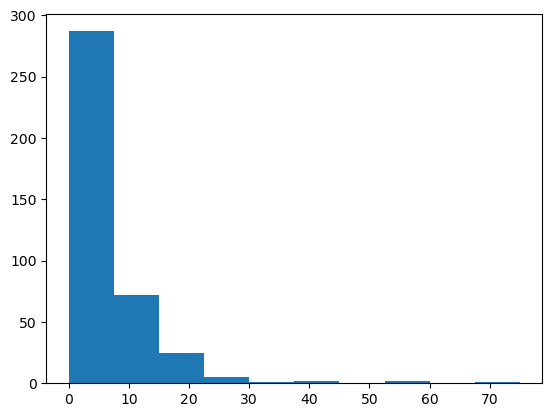

In [9]:
plt.hist(df1.absences)

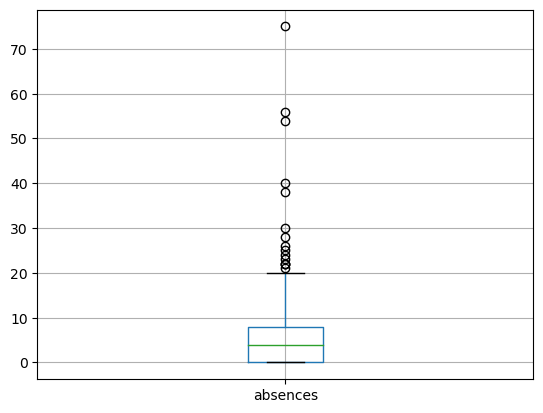

In [10]:
a = df1.boxplot('absences')

### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

In [11]:
# travel age(3), traveltime(3), freetime(5) total 11
a = df1.isnull().sum()

In [12]:
len(df1)

395

In [13]:
print(f'DF의 age: {a["sex"]}, traveltime: {a["traveltime"]}, freetime: {a["freetime"]}가 missing value 이다.')
print(f'이는 전체 데이터셋 {len(df1)} 중 {a["sex"]}+{a["traveltime"]}+{a["freetime"]}, 약 2.78% 이므로 결측치 행을 제거한다')
df_d = df1.copy()
df_d = df_d.dropna(axis=0)

DF의 age: 0, traveltime: 3, freetime: 5가 missing value 이다.
이는 전체 데이터셋 395 중 0+3+5, 약 2.78% 이므로 결측치 행을 제거한다


In [14]:
df_d.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         384 non-null    object 
 1   age         384 non-null    float64
 2   Pstatus     384 non-null    object 
 3   Fedu        384 non-null    int64  
 4   Medu        384 non-null    int64  
 5   guardian    384 non-null    object 
 6   studytime   384 non-null    int64  
 7   traveltime  384 non-null    float64
 8   failures    384 non-null    int64  
 9   famrel      384 non-null    int64  
 10  freetime    384 non-null    float64
 11  absences    384 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 39.0+ KB


In [15]:
age_median = df1.age.median()
traveltime_median = df1.traveltime.median()
freetime_median = df1.freetime.median()
df1.age.fillna(age_median, inplace=True)
df1.traveltime.fillna(traveltime_median, inplace=True)
df1.freetime.fillna(freetime_median, inplace=True)

In [16]:
df1.guardian.value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [17]:
df1.Pstatus.value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [18]:
# label encoding for type object: sex(2 class), guardian(3 class) and Pstatus (2 class)
le = LabelEncoder()
df1.sex = le.fit_transform(df1['sex'])
df1.guardian = le.fit_transform(df1['guardian'])
df1.Pstatus = le.fit_transform(df1['Pstatus'])
df_d.sex = le.fit_transform(df_d['sex'])
df_d.guardian = le.fit_transform(df_d['guardian'])
df_d.Pstatus = le.fit_transform(df_d['Pstatus'])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    int32  
 1   age         395 non-null    float64
 2   Pstatus     395 non-null    int32  
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    int32  
 6   studytime   395 non-null    int64  
 7   traveltime  395 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    395 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 32.5 KB


In [20]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         384 non-null    int32  
 1   age         384 non-null    float64
 2   Pstatus     384 non-null    int32  
 3   Fedu        384 non-null    int64  
 4   Medu        384 non-null    int64  
 5   guardian    384 non-null    int32  
 6   studytime   384 non-null    int64  
 7   traveltime  384 non-null    float64
 8   failures    384 non-null    int64  
 9   famrel      384 non-null    int64  
 10  freetime    384 non-null    float64
 11  absences    384 non-null    int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 34.5 KB


In [21]:
target = ['absences']
train_cols = df1.columns[:-1]

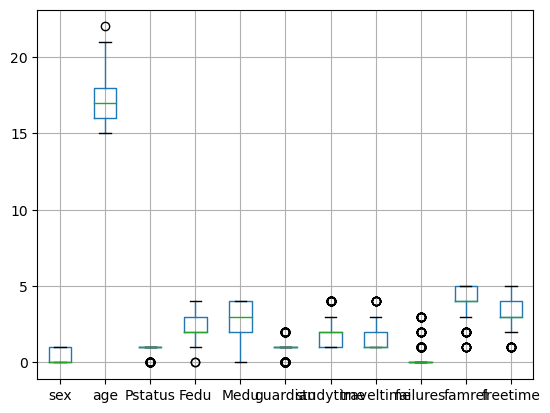

In [22]:
# mean imputation / median imputation when?
# any imputation stratagy using sklearn?
df1.boxplot(list(train_cols))
plt.show()

### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df1[train_cols], df1[target], test_size=.2, random_state=0)

In [26]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(316, 11) (79, 11) (316, 1) (79, 1)


In [27]:
name = [
    "Adaboost",
    "GradientBoost",
    "Random Forest",
    "Decision Tree",
    "MLP"
]

classifier = [
    AdaBoostRegressor(random_state=0, n_estimators=1000),
    GradientBoostingRegressor(random_state=0),
    RandomForestRegressor(max_depth=10, random_state=0),
    DecisionTreeRegressor(random_state=0),
    MLPRegressor(random_state=1, max_iter=5000, early_stopping=True)
]

In [28]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVC
from sklearn.feature_selection import f_classif


In [29]:
model = list(zip(name, classifier))

In [30]:
for name, classifier in model:
    step = [
        ('scale', RobustScaler()),
        #('feature selection', SelectKBest(score_func=f_classif, k=2)),
        #('feature_selection', SelectFromModel(LinearSVC())),
        ('model', classifier)
    ]
    pipe = Pipeline(step)
    pipe.fit(x_train, y_train.values.ravel())
    pipe.fit(x_test, y_test.values.ravel())
    pred = pipe.predict(x_test)
    acc = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    #rept = classification_report(y_test, pred)
    
    print(f'model {name} accuracy: {acc}, mse:{mse}')

model Adaboost accuracy: 0.48433439583096516, mse:60.535060230863394
model GradientBoost accuracy: 0.8244674707942928, mse:20.60612951888898
model Random Forest accuracy: 0.7760575656893864, mse:26.28906919453056
model Decision Tree accuracy: 0.9986521421044873, mse:0.15822784810126583
model MLP accuracy: -0.22814333311512436, mse:144.17430606422005


In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_d[train_cols], df_d[target], test_size=.2, random_state=0)

In [32]:
for name, classifier in model:
    step = [
        ('scale', RobustScaler()),
        #('feature selection', SelectKBest(score_func=f_classif, k=2)),
        #('feature_selection', SelectFromModel(LinearSVC())),
        ('model', classifier)
    ]
    pipe = Pipeline(step)
    pipe.fit(x_train, y_train.values.ravel())
    pipe.fit(x_test, y_test.values.ravel())
    pred = pipe.predict(x_test)
    acc = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    #rept = classification_report(y_test, pred)
    
    print(f'model {name} accuracy: {acc}, mse:{mse}')

model Adaboost accuracy: 0.761392391716012, mse:21.356286434954857
model GradientBoost accuracy: 0.8492797583196932, mse:13.490033599596075
model Random Forest accuracy: 0.8593595219346107, mse:12.587856504301568
model Decision Tree accuracy: 1.0, mse:0.0
model MLP accuracy: 0.49166382906460526, mse:45.49801638690236


In [33]:
#train_cols = ['age', 'Medu', 'guardian', 'famrel']

In [34]:
import statsmodels.formula.api as sm

In [35]:
df1

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,0,18.0,0,4,4,1,2,2.0,0,4,3.0,6
1,0,17.0,1,1,1,0,2,1.0,0,5,3.0,4
2,0,15.0,1,1,1,1,2,1.0,3,4,3.0,10
3,0,15.0,1,2,4,1,3,1.0,0,3,2.0,2
4,0,17.0,1,3,3,0,2,1.0,0,4,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20.0,0,2,2,2,2,1.0,2,5,5.0,11
391,1,17.0,1,1,3,1,1,2.0,0,2,4.0,3
392,1,21.0,1,1,1,2,1,1.0,3,5,5.0,3
393,1,18.0,1,2,3,1,1,3.0,0,4,4.0,0


In [36]:
sm.ols('absences~sex+age+Pstatus+Fedu+Medu+guardian+studytime+traveltime+failures+famrel+freetime', data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               absences   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.488
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           0.000115
Time:                        10:08:40   Log-Likelihood:                -1362.7
No. Observations:                 395   AIC:                             2749.
Df Residuals:                     383   BIC:                             2797.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4587      6.104     -1.222      0.223     -19.461       4.543
sex           -1.2843      0.847     -1.516      0.130      -2.950       0.381
age            1.0152      0.330      3.081      0.002       0.367       1.663
Pstatus       -2.7686      1.301     -2.129      0.034      -5.326      -0.211
Fedu          -0.2725      0.471     -0.578      0.563      -1.198       0.654
Medu           1.1557      0.469      2.465      0.014       0.234       2.077
guardian       1.4831      0.781      1.900      0.058      -0.051       3.018
studytime     -0.9268      0.502     -1.846      0.066      -1.914       0.061
traveltime    -0.0169      0.577     -0.029      0.977      -1.151       1.117
failures       0.2530      0.572      0.443      0.658      -0.871       1.377
famrel        -0.3225      0.443     -0.728      0.467      -1.194       0.549
freetime      -0.4197      0.411     -1.022      0.308      -1.227       0.388
==============================================================================
Omnibus:                      328.043   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7383.549
Skew:                           3.406   Prob(JB):                         0.00
Kurtosis:                      23.055   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

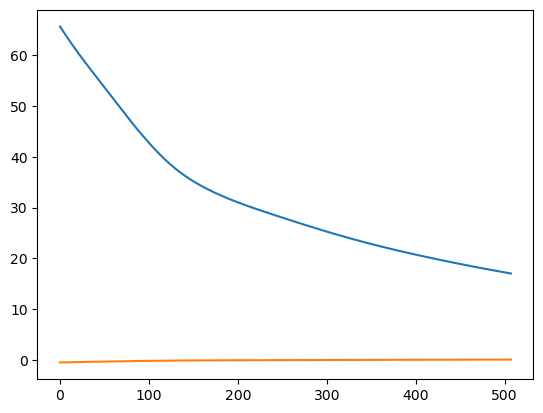

In [37]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)

### 1-6 모델 최적화 방안에 대해 구체적으로 설명하라

In [56]:
# https://m.cafe.daum.net/oracleoracle/SgNT/150?listURI=%2Foracleoracle%2FSgNT
from sklearn.model_selection import GridSearchCV 

param_grid = [
    {'activation' : ['identity', 'logistic', 'tanh', 'relu'], #활성화 함수 종류 4가지 중 가장 적합한 것을 알아서 찾아내라
     'solver' : ['lbfgs', 'sgd', 'adam'], #옵티마이져(최적화)의 종류 3가지
     'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)],
     'random_state' : [1,2,3,4,5,6,7,8,9,10]}]

clf = GridSearchCV(MLPRegressor(), param_grid, cv=3, n_jobs = -1, verbose = 2 )
clf.fit(x_train, y_train.values.ravel())

print("Best parameters set found on development set:")
print(clf.best_params_)

# Best parameters set found on development set: {'activation': 'identity', 'hidden_layer_sizes': (7,), 'random_state': 7, 'solver': 'sgd'}
y_hat=clf.predict(x_test)
 
import scipy.stats as stats
y_test = y_test.to_numpy()
y_test = np.ndarray.flatten(y_test)
svm_report = stats.pearsonr(y_test, y_hat)
print(svm_report)

Fitting 3 folds for each of 2520 candidates, totalling 7560 fits
Best parameters set found on development set:
{'activation': 'identity', 'hidden_layer_sizes': (15,), 'random_state': 8, 'solver': 'sgd'}
PearsonRResult(statistic=0.23091129322502835, pvalue=0.04333249679461119)


C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 7560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multil

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df_d[train_cols], df_d[target], test_size=.2, random_state=0)

In [60]:
name = [
    "Adaboost",
    "GradientBoost",
    "Random Forest",
    "Decision Tree",
    "MLP"
]

classifier = [
    AdaBoostRegressor(random_state=0, n_estimators=1000),
    GradientBoostingRegressor(random_state=0),
    RandomForestRegressor(max_depth=10, random_state=0),
    DecisionTreeRegressor(random_state=0),
    MLPRegressor(activation='identity', solver='sgd', random_state=8, max_iter=5000, early_stopping=True)            
]

In [61]:
for name, classifier in model:
    step = [
        ('scale', RobustScaler()),
        #('feature selection', SelectKBest(score_func=f_classif, k=2)),
        #('feature_selection', SelectFromModel(LinearSVC())),
        ('model', classifier)
    ]
    pipe = Pipeline(step)
    pipe.fit(x_train, y_train.values.ravel())
    pipe.fit(x_test, y_test.values.ravel())
    pred = pipe.predict(x_test)
    acc = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    #rept = classification_report(y_test, pred)
    
    print(f'model {name} accuracy: {acc}, mse:{mse}')

model Adaboost accuracy: 0.761392391716012, mse:21.356286434954857
model GradientBoost accuracy: 0.8492797583196932, mse:13.490033599596075
model Random Forest accuracy: 0.8593595219346107, mse:12.587856504301568
model Decision Tree accuracy: 1.0, mse:0.0
model MLP accuracy: 0.49166382906460526, mse:45.49801638690236


# 통계분석

### 2. 광고횟수와 광고비에 따른 매출액의 데이터이다. 

In [62]:
import pandas as pd

data = {
    '광고횟수' : [2, 3, 4, 4, 5, 6, 7, 9, 11, 12, 13],
    '광고비' : ["낮음", "낮음", "낮음", "높음", "높음", "높음", "낮음", "높음", "높음", "낮음", "높음"],
    '매출액' : [15, 16, 17, 18, 20, 22, 24, 26, 28, 29, 31]
}

adv = pd.DataFrame(data)
adv

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20
5,6,높음,22
6,7,낮음,24
7,9,높음,26
8,11,높음,28
9,12,낮음,29


### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

In [63]:
onehot = pd.get_dummies(adv['광고비'])

In [64]:
adv = pd.concat([adv, onehot], axis=1)

In [65]:
target = adv['매출액']
train_col = adv[['광고횟수', '낮음', '높음']]

In [66]:
import statsmodels.api as sm

In [67]:
results = sm.OLS(target, sm.add_constant(train_col)).fit()

In [68]:
results.summary()

C:\Users\Devin\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           9.96e-08
Time:                        10:25:26   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2836      0.374     22.175      0.000       7.422       9.145
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
낮음             3.8805      0.285     13.621      0.000       3.223       4.537
높음             4.4032      0.364     12.109      0.000       3.565       5.242
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                     9.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 2-2 회귀식이 유의한지 판단

In [69]:
# 1) R-squared: 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율 1에 가까우므로 성능 좋다고 할 수 있음
# 2) F-Stat: F통계량으로 도출된 회귀식이 적절한지 볼 수 있음, 0과 가까울수록 적절함
# 3) p-value: 모든 독립 변수들 p-value가 0.05보다 작으므로 통계적으로 유의함

### 3. A생산라인, B생산라인 각각에서 12개의 제품을 샘플로 뽑았다. A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65 (두 모집단 정규분포 따른다?)

### 3-1 귀무가설과 대립가설을 세워라 

- H0: A생산라인의 제품의 평균과 B생산라인 제품의 평균은 차이가 없다 (동일하다)
- H1: A생산라인의 제품의 평균과 B생산라인 제품의 평균은 차이가 있다 (동일하지 않다)

### 3-2 두 평균이 차이가 있는지 검정하라

 - 두 모집단 간 평균에 대한 차이: 소표본이므로 t-test
 - 등분산 / 이분산 확인을 위하여 F-test 수행
 - 등분산: 동일 분산에 대한 추정량 필요 -> 두 표본 결합하여 합동 표본 분산 계산
 - 이분산: welch 근사 t 검정 수행

 1) F test
  - F = Var(X) / Var(Y), where df1 = len(X) - 1 , df2 = len(Y) - 1
  - scipy.stats.f for p-value using cdf (1-CDF)
  - [refrence1](https://vitalflux.com/two-sample-t-test-formula-examples/)
  - [referenc2](https://www.statology.org/how-to-calculate-a-p-value-from-a-t-test-by-hand/)
  - https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python
  - https://it-freelancer.tistory.com/171
  - https://www.cuemath.com/p-value-formula/

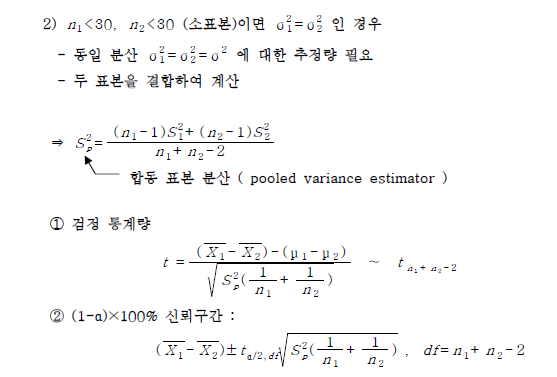

In [70]:
from IPython.display import Image 
Image("stat2.png")

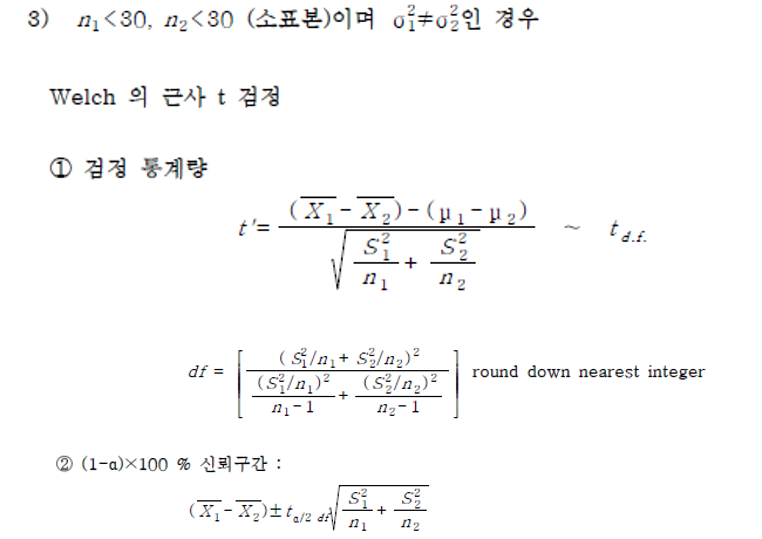

In [71]:
Image("stat3.png")

In [72]:
#https://www.jmp.com/ko_kr/statistics-knowledge-portal/t-test/two-sample-t-test.html
X_1 = 5.7
sig_1 = 0.03
var_1 = sig_1**2
df_1 = 12 - 1

X_2 = 5.6
sig_2 = 0.04
var_2 = sig_2**2
z = 1.65
df_2 = 12 - 1

In [73]:
F = var_1 / var_2
F

0.5625

In [74]:
p = 2.0*(1.0 - scipy.stats.f.cdf(F, df_1, df_2))
p # 0.05보다 크므로 귀무가설 채택: 등분산이다

1.645842742959706

In [75]:
sp = (df_1 *var_1 + df_2*var_2) / (df_1 + df_2)
t = (X_1 - X_2) / np.sqrt(sp*(1/12+1/12))
t # t value > t critical : reject

6.928203230275546

In [78]:
pval = scipy.stats.t.sf(np.abs(t), df_1)*2 
pval

2.4933122290613318e-05

- 이분산 독립표본 t 검정 (welch two sample test?)
- T = (X1_hat - X2_hat) / sqrt((var_1 / n1) + (var_2 / n2))

In [ ]:
t = (mu_a - mu_b) / np.sqrt((sig_a**2/n) + (sig_b**2)/n)
t

In [ ]:
from scipy.stats import ttest_ind

### 4. 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라 (유병율 = 0.01)

![](https://github.com/Ssunbell/ADP_study/blob/main/7주차_0625/data/problem4.png?raw=true)

In [79]:
(370*385) / (385*380)

0.9736842105263158

### 5 주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]

In [81]:
#https://it-freelancer.tistory.com/173
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

#### 신뢰구간 추정
 1) 모분산을 알때
     - 정규분포 활용 (Z = (X_bar-u) / (sigma/sqrt(n)))
        * X_bar: 표본평균, n: 표본개수, u: 모평균, sigma: 모표준편차
     - P(-1.96 <= Z <= 1.96) = 0.95 == P(-z_a/2 <= Z <= z_a/2) = 1-a
     - P(X_bar - z_a/2*sigma/sqrt(n) <= mu <= X_bar + z_a/2*sigma/sqrt(n)0
 2) 모분산 모를때
     - n >= 30? 100: 정규분포 활용
     - n < 30: t분포 활용 (모집단 정규분포 따를때)
 

 - 모분산을 모르고 n < 30 이므로 t 분포 활용 (정규분포에서 추출한 표본)
 - 표본표준편차 s 사용, dof = n-1

In [82]:
x_bar = np.mean(data)
s = np.std(data) # 표본표준편차
n = len(data) - 1
t = 2.306
lower_itv = x_bar - t*s/np.sqrt(n)
upper_itv = x_bar + t*s/np.sqrt(n)
print(round(lower_itv, 3), round(upper_itv, 3))

3.478 4.3


### 5.2 sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

 - 모분산을 알고있으므로 정규분포 활용

In [83]:
sigma = .04
z = 1.96
n = len(data)

In [84]:
lower_interval = x_bar - z*sigma/np.sqrt(n)
upper_interval = x_bar + z*sigma/np.sqrt(n)
print(round(lower_interval,3), round(upper_interval,3))

3.863 3.915
